# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern


### Name : Lakshman Gadde

### Task 2 :Prediction using Unsupervised ML 
###### To predict the optimum number of  clusters in the given Iris dataset and represent it visually. 

#### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

##### load the iris dataset by importing libraries 

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names) #creating the dataframe

In [9]:
iris_df.head() #reading the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
k_rng=range(1,10)
sse= [] #sum of squared errors

for k in k_rng:
    km = KMeans(n_clusters = k, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    km.fit(iris.data)
    #calling inertia method gives sum of squared errors
    sse.append(km.inertia_)
    
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049]

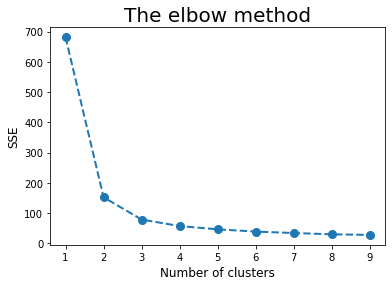

In [11]:
# Plotting the results onto a line graph
plt.plot(k_rng, sse, marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.title('The elbow method',size=20)
plt.xlabel('Number of clusters',size=12)
plt.ylabel('SSE',size=12) #sum of squared error
plt.show()

#### The optimum number of clusters is where the Elbow occurs.

#### Using Elbow plot the observed optimum number of clusters are '3'

In [12]:
km = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = km.fit_predict(iris.data)

In [13]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [14]:
#add y_pred(cluster) to the dataset
iris_df['cluster']=y_pred

In [15]:
#create new dataframes based on the clusters
df1=iris_df[iris_df.cluster==1]
df0=iris_df[iris_df.cluster==0]
df2=iris_df[iris_df.cluster==2]

In [16]:
km.cluster_centers_ #to identify the cluster centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### # Visualising the clusters - By using sepal dimmensions

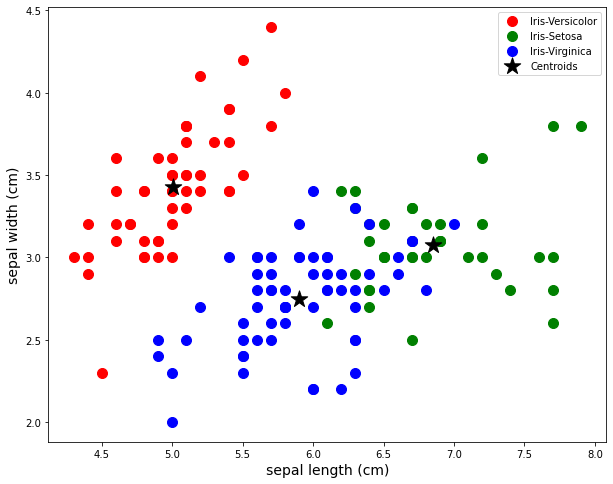

In [17]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],s=100,color='red',label='Iris-Versicolor')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],s=100,color='green',label='Iris-Setosa')

plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],s=100,color='blue',label='Iris-Virginica')
# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 300, c = 'black', label = 'Centroids', marker='*')
plt.xlabel('sepal length (cm)',size=14)
plt.ylabel('sepal width (cm)',size=14)
plt.legend()

### # Visualising the clusters - By using petal dimmensions

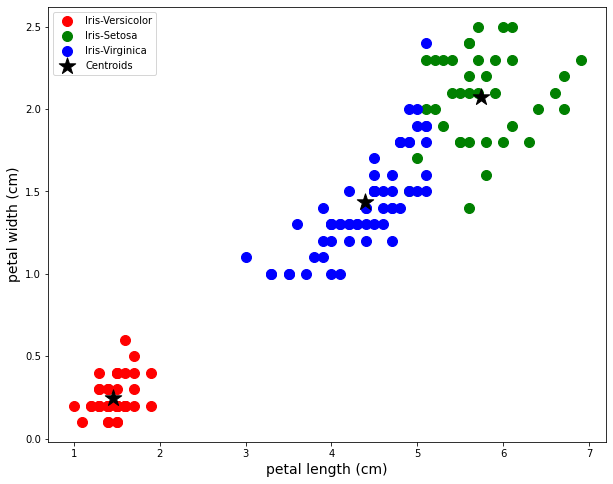

In [18]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],s=100,color='red',label='Iris-Versicolor')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],s=100,color='green',label='Iris-Setosa')

plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],s=100,color='blue',label='Iris-Virginica')
# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 300, c = 'black', label = 'Centroids', marker='*')

plt.xlabel('petal length (cm)',size=14)
plt.ylabel('petal width (cm)',size=14)
plt.legend()

## From the above two plots we can distinguish the flower type

### Using petal dimmensions we can easily identify to which category the flower belongs to.

# 

# Thankyou